## Biased and Unbiased Point Estimators - Sample mean and variance

Suppose that we want to know how a measure of a population spreads around the mean. Given a finite population $X=\{x_1, x_2, \dots, x_N\}$ of size $N$, we can can compute the variance $\sigma^2$ of the population as follows:


$$ \sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2 $$

where $\mu$ is the mean of the population, defined as:

$$ \mu = \frac{1}{N} \sum_{i=1}^N x_i $$ 

Let's implement these functions:


In [2]:
def mean(x):
    return sum(x) / len(x)

def variance(x, m = None):
    m = m or mean(x)
    norm_squared = [(x_i - m)**2 for x_i in x]
    return sum(norm_squared) / len(x)

Now, let's suppose we are studing a concrete population of size $N=500000$, and we can observe every value in the population. To do so, we generate a random population and we compute the true variance and mean with the previous functions:

In [3]:
import random

population_size = 500000
population = [random.randint(0,100) for _ in range(population_size)]

In [4]:
true_variance = variance(population)
true_mean = mean(population)
print("Population variance: {0}. Population mean {1}".format(true_variance, true_mean))

Population variance: 849.7181490775598. Population mean 50.007136


However, in many real situations, the true mean and variance are not known since it is not possible to measure every value in a population. In these situations, we would like to be able to somehow _estimate_ the real parameters of the population using a sample of size $n < N$ taken from the population. How can this be accomplished?. Let's start by taking a small sample of size $n=10$ from our population and calculating the mean and variance of the sample.

In [7]:
small_sample = random.sample(population, 10)
variance_sample = variance(small_sample)
mean_sample = mean(small_sample)
print("Sample variance: {0}. Sample mean: {1}".format(variance_sample, mean_sample))

Sample variance: 970.01. Sample mean: 57.3


What we did here is to estimate the population mean and variance using a sample. The sample variance is computed in the same way as the population variance but using the sample instead. This is usually denoted as $\hat\sigma^2$ and it is defined as:

$$\hat\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \hat\mu)^2 $$

where $\hat\mu$ denotes the sample mean:

$$\hat\mu = \frac{1}{n} \sum_{i=1}^n x_i $$ 

Can we use these values to get some insight about the true variance and mean? i.e., are the mean and the variance of the sample good estimators of the mean and variance of a population?. Well, If we had luck with our sample (and assuming that these functions are good estimators) these values should be close to the real values, but since the sample is very small, we can expect that every time we take a sample of $n=20$, the mean and variance may vary significatively. Let's see what happen if we repeat this 10 times:

In [6]:
for _ in range(10):
    sample = random.sample(population, 20)
    print("Sample variance: {:.2f}. Sample mean: {:.2f}".format(variance(sample), mean(sample)))

Sample variance: 591.04. Sample mean: 40.60
Sample variance: 614.69. Sample mean: 52.90
Sample variance: 902.03. Sample mean: 43.15
Sample variance: 957.83. Sample mean: 53.65
Sample variance: 476.40. Sample mean: 47.00
Sample variance: 826.26. Sample mean: 50.20
Sample variance: 931.66. Sample mean: 48.80
Sample variance: 539.79. Sample mean: 57.75
Sample variance: 880.23. Sample mean: 52.65
Sample variance: 760.65. Sample mean: 40.95


As can be seen, the estimations vary significatively, as expected. Intuitively, as we take bigger samples, estimations should approach to the real values. Let's compute the variance and mean with samples of size 1000

In [22]:
for _ in range(10):
    sample = random.sample(population, 1000)
    print("Sample variance: {:.2f}. Sample mean: {:.2f}".format(variance(sample), mean(sample)))

Sample variance: 850.19. Sample mean: 48.99
Sample variance: 839.78. Sample mean: 50.11
Sample variance: 845.33. Sample mean: 48.94
Sample variance: 855.05. Sample mean: 50.70
Sample variance: 812.00. Sample mean: 49.20
Sample variance: 875.37. Sample mean: 50.13
Sample variance: 833.69. Sample mean: 49.26
Sample variance: 835.10. Sample mean: 50.30
Sample variance: 884.06. Sample mean: 51.31
Sample variance: 857.01. Sample mean: 49.73


Now, the estimations are much closer to the true mean and population and vary less with different samples. However, this still does not give us much information about $\hat\sigma^2$ and $\hat\mu$. We want to answer the following question: are $\hat\sigma^2$ and $\hat\mu$ good (point) estimators for the population variance and mean respectively? i.e., if we compute many times the variance and mean for different samples of the same population using $\hat\sigma^2$ and $\hat\mu$, will we obtain, on average, the true variance and mean of the population? What we can do now is to compute the average value of the estimations for samples of different size, and see what happens:

In [36]:
sizes = range(2,30,1)

def generate_samples(population, sample_size, num_samples=10000):
    return [random.sample(population, sample_size) for _ in range(num_samples)]

def expected_value(samples, function):
    return mean(list(map(lambda x : function(x), samples)))

var_ratios = []

for k in sizes:
    samples = generate_samples(population, k)
    expected_variance = expected_value(samples, variance)
    expected_mean = expected_value(samples, mean)
    ratio_variance = expected_variance / true_variance
    ratio_mean = expected_mean / true_mean
    var_ratios.append(ratio_variance)
    print("Sample size {} (10000 trials). Variance: {:.2f} ({:.2f}) - Mean: {:.2f} ({:.2f})".format(k, expected_variance, ratio_variance, expected_mean, ratio_mean))

Sample size 2 (10000 trials). Variance: 425.87 (0.50) - Mean: 50.60 (1.01)
Sample size 3 (10000 trials). Variance: 563.10 (0.66) - Mean: 50.00 (1.00)
Sample size 4 (10000 trials). Variance: 643.00 (0.76) - Mean: 50.13 (1.00)
Sample size 5 (10000 trials). Variance: 682.54 (0.80) - Mean: 50.07 (1.00)
Sample size 6 (10000 trials). Variance: 705.64 (0.83) - Mean: 49.99 (1.00)
Sample size 7 (10000 trials). Variance: 727.76 (0.86) - Mean: 50.09 (1.00)
Sample size 8 (10000 trials). Variance: 741.48 (0.87) - Mean: 50.03 (1.00)
Sample size 9 (10000 trials). Variance: 749.06 (0.88) - Mean: 49.94 (1.00)
Sample size 10 (10000 trials). Variance: 769.23 (0.91) - Mean: 50.10 (1.00)
Sample size 11 (10000 trials). Variance: 775.62 (0.91) - Mean: 49.97 (1.00)
Sample size 12 (10000 trials). Variance: 774.69 (0.91) - Mean: 50.04 (1.00)
Sample size 13 (10000 trials). Variance: 784.83 (0.92) - Mean: 49.93 (1.00)
Sample size 14 (10000 trials). Variance: 782.71 (0.92) - Mean: 49.90 (1.00)
Sample size 15 (1000

As can be seen, something strange happens. On average, the estimation of the mean for samples of different size matches the real mean of the population. However, the estimation of the variance underestimates the population variance for small samples, i.e., the estimator is _biased_. Let's plot the ratio __average\_variance / true\_variance__:

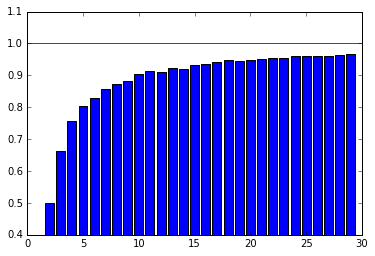

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_hist(sample_sizes, values):
    plt.axhline(1, color='red')
    plt.bar(sample_sizes, values, align='center')
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2,0.4,1.1))
    
plot_hist(sizes, var_ratios)

As can be seen, something is wrong with our estimation of the variance! For small samples, the value is far from 1. For example, for samples of size 2, the estimated variance is $\hat\sigma^2 = 0.5\sigma^2$. As we increase the sample size, the estimation becomes better. The bars also show an interesting pattern. For samples of size 2, the value is almost 0.5. For samples of size 3, the value is 0.67, for size 4, 0.8... Concretely, the values of the bars follow $\frac{n-1}{n}$ . Let's plot this:

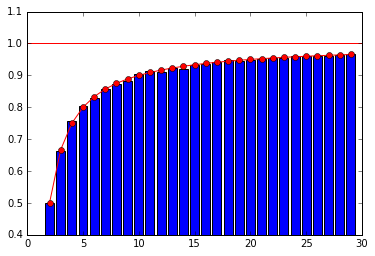

In [50]:
plot_hist(sizes, var_ratios)
plt.plot(sizes, [(n-1)/n for n in sizes],'r-o')

It seems that our estimator $\hat\sigma^2$ on average is $\frac{n-1}{n}\sigma^2$, i.e., the estimator is biased by a factor of $\frac{n-1}{n}$ .  Now that we have figured this out, it is very easy to compute an unbiased estimator. We just need to multiply the result of the estimator by $\frac{n}{n-1}$. Let's define the unbiased version of the estimator and recompute the experiment.

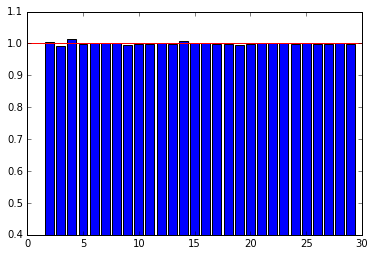

In [52]:
def unbiased_variance(x):
    return variance(x)*(len(x)/(len(x)-1))

unbiased_var = [expected_value(generate_samples(population, k), unbiased_variance) for k in sizes]
unbiased_var_ratios = list(map(lambda x : x / true_variance, unbiased_var))
plot_hist(sizes, unbiased_var_ratios)

Note that, since we have multiplied $\hat\sigma^2$ by $\frac{n}{n-1}$ for correcting the bias, we have:

$$ s^2 = \frac{n}{n-1} \cdot \frac{1}{n} \sum_{i=1}^{n} (x_i - \hat\mu)^2 =  \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \hat\mu)^2$$

Which leads to the typical formula of the unbiased estimator for the variance $s^2$.

Ok, now we have the unbiased point estimator of the variance. But why $\hat\sigma^2$ is biased? This is related to the concept of degrees of freedom. The problem is that, in order to estimate the variance of a sample, we used the same sample to estimate first the mean, and we used this value to estimate the variance. Thus, we used $N$ independent pieces of information to estimate the variance minus one (the estimated mean). We can check now that, if we use the true mean of the population to estimate the variance, we do not observe any bias:

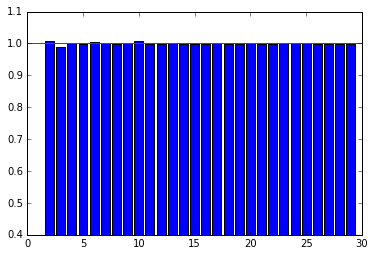

In [53]:
def variance_with_true_mean(x):
    return variance(x, true_mean)

unbiased_var_true_mean = [expected_value(generate_samples(population, k), variance_with_true_mean) for k in sizes]
plot_hist(sizes, list(map(lambda x : x / true_variance, unbiased_var_true_mean)))